In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
X=pd.DataFrame(iris["data"],columns=iris["feature_names"])

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
y=pd.DataFrame(iris["target"])

In [9]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid={
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[1,2,3,4,5,6,7],
    "splitter":["best","random"],
    "max_features":["sqrt","log2"]
}

In [12]:
tuned_model=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)

In [13]:
tuned_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [15]:
tuned_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plotting the tree
plt.figure(figsize=(15,10))
tree.plot_tree(tuned_model, filled=True)
plt.show()


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']}) instead.

<Figure size 1500x1000 with 0 Axes>

In [ ]:
''' 
The error you're encountering happens because you're trying to pass a GridSearchCV object (tuned_model) directly to tree.
plot_tree. However, tree.plot_tree requires a decision tree model, not the entire GridSearchCV object.
'''

In [17]:
#This is the best tree constructed
tuned_model.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='log2')

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'x[0] <= 6.15\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.25, 0.375, 'x[2] <= 4.75\ngini = 0.375\nsamples = 36\nvalue = [0, 27, 9]'),
 Text(0.125, 0.125, 'gini = 0.074\nsamples = 26\nvalue = [0, 25, 1]'),
 Text(0.375, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [0, 2, 8]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.388\nsamples = 38\nvalue = [0, 10, 28]'),
 Text(0.625, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [0, 10, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

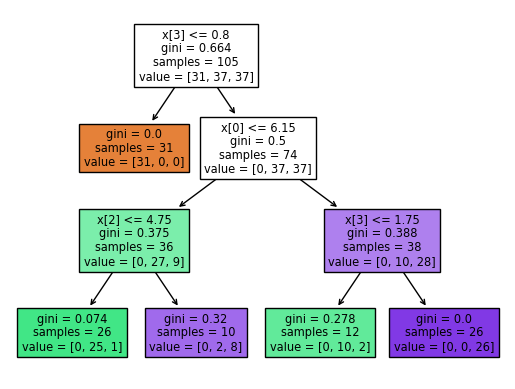

In [19]:
from sklearn import tree
#import matplotlib.pyplot as plt

# Plotting the tree
#plt.figure(figsize=(15,10))
best_tree=tuned_model.best_estimator_
tree.plot_tree(best_tree, filled=True)
#plt.show()


In [19]:
tuned_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [20]:
y_pred=tuned_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,y_pred))
print(f"accuracy of the model is {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

[[19  0  0]
 [ 0  4  9]
 [ 0  0 13]]
accuracy of the model is 0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.31      0.47        13
           2       0.59      1.00      0.74        13

    accuracy                           0.80        45
   macro avg       0.86      0.77      0.74        45
weighted avg       0.88      0.80      0.77        45

